<a href="https://colab.research.google.com/github/gkacton/M4SJ/blob/main/Data_Culture_Autumn_Workshop_Explore_Mitchell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Session
## 🌻 Fun with Press Directories 🦄

What we will do in this session:
- Introduce notebooks and pandas as a framework for working with historical tabular data.
- Investigate the content of the digitized Press Directories.
- Explore a few case studies that demonstrate how to use the directories for research on the press.

![](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExMGExemc4c3ZhaDVzNTZlM2JnNDFvcm11YW53bmY1cnk3cGM0bm40ZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lTpme2Po0hkqI/giphy.gif)

### First of all... Notebooks <3

...what am I looking at here?


*Welcome to* **Markdown**

You write text...

In [ ]:
# and Python code
print('Hello, World')

Hello, World


In [ ]:
# text is Python is called strings, abbreviated as str
type('Hello, World')

In [ ]:
# but of course, Python also accepts numbers!
4 + 2

In [ ]:
# or floats
4.0 + 3.42

7.42

In [ ]:
# saving information in a variable
a = 'hello'
print(a)

❗ You will need to run all the cells in order ❗

Now you know enough technical stuff to follow along.

## Finding the Directories Online



You can consult the directories [online](https://bl.iro.bl.uk/concern/datasets/adcef12a-bb3d-40d9-871d-5784022a77e8)

Let's have a look at the documentation first and open the attached PDF.

We will have a closer look at how to explore the directories using code (Python). However, if you are more comfortable with Excel (😵‍💫) feel free to explore the data there (life is short).

### Why Python

This session is not an introduction to Python or programming.

The goal is to show what you can do with the Press Directories, using a bit of code.

For those who know Python, relax and follow along.

Those new to coding should try to understand what is happening and focus on the outcomes (not the code). All code is explained with comments, but don't try to understand the syntax.

If you are intrigued, I can recommend [this book](https://jakevdp.github.io/PythonDataScienceHandbook/) if you want more and work with data frames/tabular data in Python!

## Exploring the Directories with Pandas

![pandas](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExanp1NHdzbnA4cWUxdGNoazYwN2c0Y2E5am96YW5rNTNkd2Q4YXJtdiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/aCa8jFalHHJvi/giphy.gif)

### Importing data

In [1]:
# import the pandas library
import pandas as pd

In [2]:
# open the CSV file given the URL
# you can also download the file and use it locally
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [3]:
# replace the NaN (not a number) values with empty spaces
# otherwise code will break later on
df.fillna('', inplace=True)

In [4]:
# show the number rows and columns
print(df.shape)

(92266, 16)


In [5]:
# example of first two rows
df.head(2)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
0,MPD_1846_57,CID_000000,1846,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
1,MPD_1847_65,CID_000000,1847,JUSTICE OF THE PEACE .,6d,,"January 28 , 1837",Saturday,Henry Shaw,,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."


In [6]:
# random sample of 2 rows
df.sample(2)

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
48632,MPD_1881_1492,CID_001575,1881,LLANDUDNO DIRECTORY AND CRONICL CYMRU .,2d,independent,1854,Saturday,,Douglas<SEP>Brothers,llandudno,Q996492,"(53.32, -3.82)",Llandudno,"[{'mention': 'Llandudno', 'pos': 29, 'sent_idx...",LLANDUDNO DIRECTORY AND CRONICL CYMRU . I Satu...
51873,MPD_1877_1148,CID_001767,1877,WALSALL OBSERVER & SOUTH STAFFORD - SHIRE CHRO...,1d,independent,"October , 1868",Saturday,J. and W. Griffin,,walsall,Q504530,"(52.58, -1.98)",Walsall<SEP>Lichfield<SEP>Hednesford<SEP>Brown...,"[{'mention': 'Walsall', 'pos': 29, 'sent_idx':...",WALSALL OBSERVER & SOUTH STAFFORD - SHIRE CHRO...


In [7]:
# show all the column names
df.columns

Index(['ID', 'CHAIN_ID', 'YEAR', 'TITLE', 'PRICE', 'POLITICS',
       'ESTABLISHED_DATE', 'PUBLISED_DATE', 'PERSONS', 'ORGANIZATIONS',
       'PLACE_PUB', 'PLACE_PUB_WIKI', 'PLACE_PUB_COORD', 'PLACES',
       'PLACES_TRES', 'TEXT'],
      dtype='object')

### Case Study 1: How old is the average newspaper title?

**Question**: How 'old' is the average newspaper title? How does this change over time, place and by politics?

**Sub-questions**:
- What information do we need? remember `df.columns`)
- Is the information all neatly processed and parsed?


Run the code cell below to get a negative answer ;-)



In [9]:
# get all the unique values in the ESTABLISHED_DATE column
df['ESTABLISHED_DATE'].unique()

array(['January 28 , 1837', 'January 28 ; 1837', 'November , 1842', ...,
       '1861<SEP>October , 1919', 'August 15 , 1898', 'Feb . 3 , 1917'],
      dtype=object)

Wait, wait, the 'ESTABLISHED_DATE' column contains **text not numbers** (or dates).

In [10]:
print('value =',df.loc[0,'ESTABLISHED_DATE'])
print('value type =',type(df.loc[0,'ESTABLISHED_DATE']))

value = January 28 , 1837
value type = <class 'str'>


In [11]:
# get the value counts and select the top ten
df['ESTABLISHED_DATE'].value_counts()[:10]

,count
ESTABLISHED_DATE,
,5130
1855,2265
1857,1386
1856,1200
1860,1137
1868,1054
1880,1045
1859,1038
1858,1002


#### Searching with regular expressions

What to do? How can we convert these messy data to something we can work with?

We can extract the year using regular expressions.
This is a technique to create complex queries. We define a pattern that we want to find in our text data. In this case, we want to find all the years between 1700-1999.

Therefore, we look for numbers consisting of four digits:
- starting with 1
- followed by a 7,8 or 9
- and finishing with any combination of two digits

In [21]:
# import the regular expression library
import re
# create the year matching pattern
year_pattern = re.compile(r'\b1[6-9][0-9]{2}\b')

Let's evaluate the regular expression pattern on an example string
- Question 1: change the `test_string` below and test it yourself;
- Question 2: can/should you change the regular expression?

In [22]:
# create a string to test the regex
test_string = '1960 1543 0323 1789 187e 18982 1892'
# apply regex to string
year_pattern.findall(test_string)

['1960', '1789', '1892']

Now, we can apply this regex to all the values in the ESTABLISHED_DATE column and extract the year from the date string.

However, there are a few problems (which are very common when working with cultural heritage datasets).
- some rows do not have a value for these columns -> **missing data**
- some rows contain multiple years -> **irregular data**

Solutions?
- if the cell is **empty**, we take the value in the YEAR column
- if the cell contains multiple years, we focus on the first year mentioned

Please note: Both of the above steps are **choices** that must be explained and motivated!

In [23]:
# apply the regex to the ESTABLISHED_DATE data column and save result in the ESTABLISHED_YEAR column
df['ESTABLISHED_YEAR'] = df['ESTABLISHED_DATE'].apply(lambda x: year_pattern.findall(x))
# if no date has been found
# - take either the first year
# - or the value in the YEAR column
# convert the numbers to integers
df['ESTABLISHED_YEAR'] = df.apply(lambda x: int(x['ESTABLISHED_YEAR'][0]) if len(x['ESTABLISHED_YEAR']) > 0 else x['YEAR'], axis=1)

In [30]:
# inspect the result of this operation
df['ESTABLISHED_YEAR'].unique()

array([1837, 1842, 1844, 1849, 1806, 1836, 1748, 1744, 1718, 1717, 1790,
       1792, 1853, 1833, 1838, 1798, 1708, 1800, 1832, 1831, 1631, 1846,
       1856, 1877, 1845, 1816, 1820, 1830, 1789, 1769, 1772, 1834, 1828,
       1827, 1764, 1754, 1891, 1893, 1894, 1810, 1751, 1753, 1758, 1733,
       1841, 1840, 1821, 1711, 1725, 1721, 1720, 1714, 1819, 1795, 1705,
       1695, 1822, 1812, 1709, 1690, 1747, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1888, 1889, 1890, 1895, 1896, 1898, 1899,
       1900, 1803, 1808, 1835, 1809, 1843, 1848, 1801, 1600, 1802, 1782,
       1783, 1817, 1797, 1811, 1829, 1826, 1737, 1773, 1824, 1766, 1779,
       1839, 1912, 1825, 1857, 1871, 1778, 1776, 1874, 1875, 1847, 1767,
       1861, 1815, 1850, 1903, 1887, 1851, 1852, 1855, 1854, 1876, 1858,
       1905, 1865, 1799, 1910, 1869, 1902, 1907, 1908, 1914, 1915, 1920,
       1745, 1807, 1739, 1713, 1774, 1859, 1868, 1860, 1872, 1862, 1863,
       1864, 1866, 1867, 1870, 1873, 1665, 1730, 17

Now we can compute how old a newspaper is in a given year by subtracting ESTABLISHED_YEAR from YEAR. We save this in a new column with the name **SENIORITY**.

In [25]:
# save the difference between YEAR and ESTABLISHED_YEAR in the SENIORITY column
df['SENIORITY'] = df.apply(lambda x: int(x['YEAR']) - int(x['ESTABLISHED_YEAR']), axis=1)

In [26]:
# apply mean to get the average age
df['SENIORITY'].mean()

28.19219430776234

In [27]:
# longest run observed during our period
df['SENIORITY'].max()

258

In [24]:
df['ESTABLISHED_YEAR'].min()

1600

Now we can compute for each year the average SENIORITY of a newspaper titles, and plot the result

<Axes: xlabel='YEAR'>

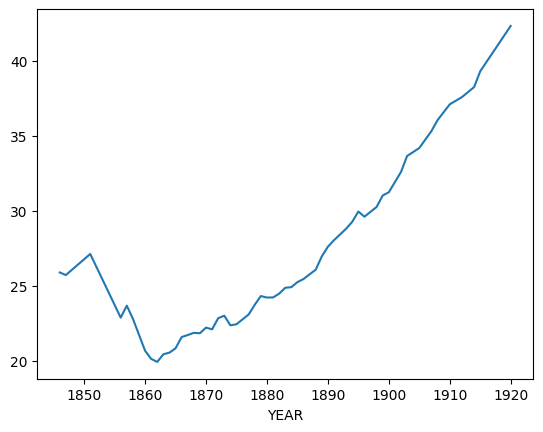

In [28]:
# groupby by year and compute the mean for the seniority column
df.groupby(['YEAR'])['SENIORITY'].mean().plot()

To make plotting prettier and easier, we can use the seaborn library.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

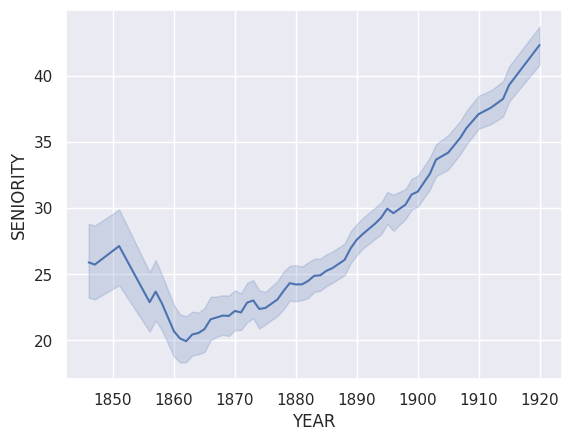

In [31]:
import seaborn as sns
sns.set()
sns.lineplot(x='YEAR',y='SENIORITY', data=df)

Let's inspect how seniority relates to the political orientation of a newspaper.

<Axes: xlabel='YEAR', ylabel='SENIORITY'>

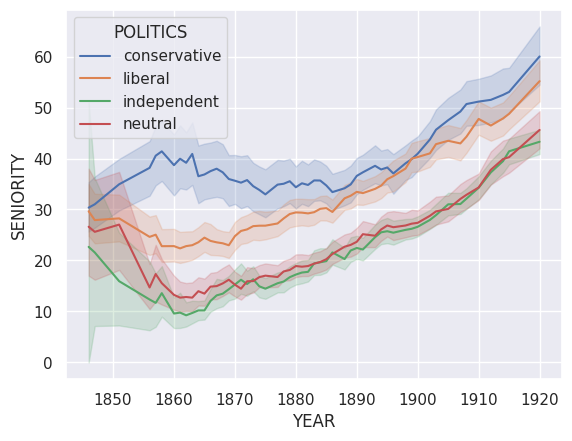

In [32]:
# subset data to row containing a specific set of political labels
data = df[df['POLITICS'].isin(['liberal', 'conservative','independent','neutral'])]
# make a lineplot
sns.lineplot(x='YEAR', # values for the x-axis
             y='SENIORITY', # values for the y-axis
             hue='POLITICS', # split data by values in this cell
             hue_order=['conservative', 'liberal','independent','neutral'], # the order of the colors/distinctions
             data=data # use this data
             )

Lastly, let's analyse and visualise how the seniority of newspaper titles differs by place. We will need to complete a few more processing steps to visualize this. Again, don't worry if Python is new to you, run the code and look at the outputs!

After running the code, download the file it produces ('by_place.csv') and load it into [kepler.gl](https://kepler.gl/)

In [33]:
# remove rows without coordinates
df = df[df['PLACE_PUB_COORD'] != '(nan, nan)']
# groupy by place name and coordinates
by_place = df.groupby(['PLACE_PUB','PLACE_PUB_COORD']).agg({'SENIORITY':'mean', 'ID': 'count'}).reset_index()
# convert the coordinates from string to a tuple
by_place['PLACE_PUB_COORD'] = by_place['PLACE_PUB_COORD'].apply(eval)
# save coordinates in different columns
by_place['point_latitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[0])
by_place['point_longitude'] = by_place.PLACE_PUB_COORD.apply(lambda x: x[1])
# remove the original column
by_place.drop('PLACE_PUB_COORD', axis=1, inplace=True)
# rename ID columns to COUNT
by_place.rename(columns={'ID':'COUNT'}, inplace=True)
# only keep places with more than 10 observation
by_place = by_place[by_place.COUNT > 10]
# save the result in csv file
by_place.to_csv('by_place.csv')
# now download the file and load it into kepler

In [34]:
by_place

,PLACE_PUB,SENIORITY,COUNT,point_latitude,point_longitude
1,aberdare,20.183673,98,51.713056,-3.445000
2,aberdeen,39.910941,393,57.150000,-2.100000
4,abergavenny,18.500000,38,51.833056,-3.017222
5,abergele,25.980000,50,53.280000,-3.580000
6,abertillery,13.769231,26,51.730000,-3.130000
...,...,...,...,...,...
1268,wycombe,19.156250,64,51.638500,-0.807900
1269,wymondham,8.615385,13,52.570000,1.116000
1270,yarmouth,19.380597,134,52.633333,1.750000
1272,yeovil,86.270833,96,50.945200,-2.637000


### Case Study 2: Women in the press

Let's explore a different question, and study the press directories through a gendered lens.
- To what extent are women present?
- How does this change over time?

In [35]:
# load the dataframe
df = pd.read_csv('https://bl.iro.bl.uk/downloads/da65047c-4d62-4ab7-946f-8e61e5f6f331?locale=en', index_col=0)

In [ ]:
# replace not a number nan with empty spaces
df.fillna('', inplace=True)

In [ ]:
# show three random rows
df.sample(3)

In [ ]:
# inspect the values in the PERSONS columns
df['PERSONS'].unique()

In [ ]:
# how many different names are there?
len(df['PERSONS'].unique())

In [ ]:
# what are the most frequent names
# does it contain women?
df['PERSONS'].value_counts()[:5]

#### Processing names

In [ ]:
# get all the misses (i.e. PERSONS starting with miss)
[p for p in df['PERSONS'].unique() if p.lower().startswith('miss')]

In [ ]:
# split the PERSONS entry by <SEP> and then by white space
persons = [i.split() for p in df['PERSONS'].unique() for i in p.split('<SEP>')]

In [ ]:
# first five persons
persons[:5]

In [ ]:
first_person = persons[0]
print(first_person)
first_name = first_person[0]
print(first_name)

In [ ]:
# to process the names we
# - get the first element of the split names
# - get the lowercased version of the first name
# - strip any white spaces around the lowercased first name
first_names_unique = set([p[0].lower().strip() for p in persons if p])
# this reduces the number of names a lot!
len(first_names_unique)

In [ ]:
#first_names_unique

In [ ]:
# I went through the first_names_unique manually and selected
# names and titles that might refer to women...
# then I constructed a regex pattern that will match any name/title
female_first_name = ['sarah', 'mary', 'rebecca', 'mrs',  'miss', 'mary', 'maryanne', 'margaret',  'marie', 'louisa', 'honoria',
'helen', 'hannah', 'florence', 'evelyn', 'esther', 'ellizabeth', 'elizabeth', 'eliza', 'dora', 'catherine',
'annie', 'anne', 'anna', 'ann', 'alice', 'alicia']
regex_pattern = '|'.join([fr"\b{n}\b" for n in female_first_name])
print(regex_pattern)

In [ ]:
# we apply the regex pattern to the PERSONS column
# for rows with a female name we have it return True, otherwise False
# we make it look a bit fancy using a tqdm progress bar
from tqdm import tqdm
tqdm.pandas()
pattern = re.compile(regex_pattern)
df['has_female_name'] = df['PERSONS'].progress_apply(lambda x: bool(pattern.search(x.lower())))

In [ ]:
# the number of rows with female names
df['has_female_name'].sum()

In [ ]:
# the percentage of rows with female names
round((df['has_female_name'].sum() / len(df))*100,2)

In [ ]:
# we can zoom in on these rows
df[df['has_female_name'] == True]

In [ ]:
# zoom in on the actual text to get more information
# on the role of women in the press
# change the idx to a number smaller dan 779
idx = 1
df.loc[df['has_female_name'] == True].iloc[idx]['TEXT']

In [ ]:
# what are the titles
df[df['has_female_name'] == True]['TITLE'].unique()

In [ ]:
# what is the political leaning of these newspapers?
df[df['has_female_name'] == True]['POLITICS'].value_counts(normalize=True)[:5]

In [ ]:
# how does this compare the newspaper landscape?
df['POLITICS'].value_counts(normalize=True)[:5]

In [ ]:
# what about changes over time?
df[df['has_female_name'] == True].groupby(['YEAR']).size().plot()

In [ ]:
df.groupby(['YEAR'])['PERSONS'].nunique().plot()
df.groupby(['YEAR'])['ORGANIZATIONS'].nunique().plot()

### Case Study 3: Your Turn!

What else would you like to find out?

In [ ]:
# let's start coding

![bye](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbmFzOHBqaTBiYXh0bGczZ2t3a3VtanRrMWNmZ2owcTVnNGtxMXp3NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Z5PxhW6BlWJjCkoPIQ/giphy.gif)

# Fin.